**Airbnb Calendar Exploratory Data Analysis**

# Introduction

## Read in libraries, data, and set notebook preferences

**Read in libraries**

In [103]:
#Read in libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Read in Data**

In [104]:
#Set path to local machine for data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\02_Intermediate/'

#Read in Airbnb Calendar data
calendar = pd.read_csv(path + '2020_0407_Calendar_Cleaned.csv', sep = ',',
                       parse_dates=['date'], dtype = {'listing_id':'category'},
                       low_memory=True,index_col=0)

**Set notebook preferences**

In [105]:
#Supress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###Set plot aesthetics for notebook###
#Style
plt.style.use('Solarize_Light2')

#Title dictionary
title_dict = {'fontsize':16,
             'fontweight': 'bold'}
#Label dictionary
label_dict = {'fontsize':12,
             'fontweight': 'bold'}

# Data Overview

## Preview Data

In [106]:
#Preview calendar data
display(calendar.head())

,available,listing_id,price
date,,,
2019-04-03,0,187730,80.0
2019-04-04,0,187730,80.0
2019-04-05,1,187730,82.0
2019-04-06,1,187730,82.0
2019-04-07,1,187730,81.0


## Data Information

In [107]:
#View calendar info
calendar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16010035 entries, 2019-04-03 to 2020-03-31
Data columns (total 3 columns):
 #   Column      Dtype   
---  ------      -----   
 0   available   int64   
 1   listing_id  category
 2   price       float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 397.7 MB


In [108]:
calendar.describe()

,available,price
count,1.601004e+07,1.396098e+07
mean,4.720531e-01,2.237470e+02
std,4.992184e-01,5.387229e+02
min,0.000000e+00,1.000000e+01
25%,0.000000e+00,1.020000e+02
50%,0.000000e+00,1.560000e+02
75%,1.000000e+00,2.420000e+02
max,1.000000e+00,2.207130e+05


**About the variables**

available	listing_id	price

# Exploratory Data Analysis

## Data distributions

Text(0.5, 1.03, 'Calendar Data Distributions')

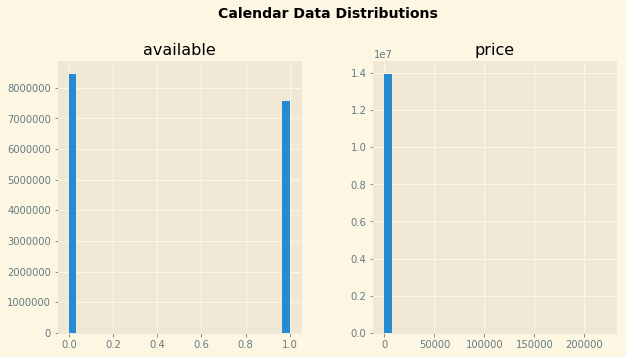

In [109]:
#Plot distributions
calendar.hist(figsize= (10,5), bins = 30);

#Set title
plt.suptitle('Calendar Data Distributions',fontsize = 14, fontweight = 800, y = 1.03 )

## Available data exploration

### Explore the listings count over the last 18 months

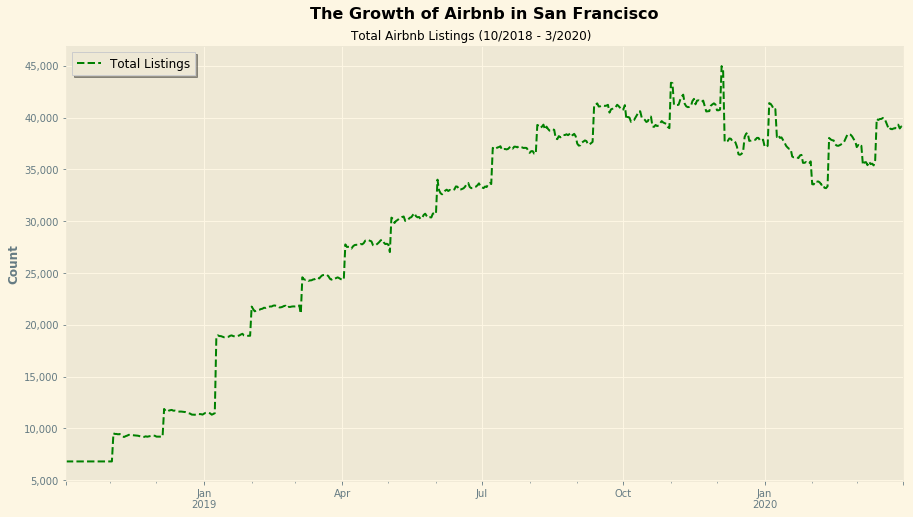

In [110]:
#Plot count of totdal listings per day
ax = calendar.groupby(['date'])['listing_id'].count().plot(figsize = (15,8), 
                                                           markersize = 1, linestyle = '--',
                                                            color = 'g', label = 'Total Listings')

####Set plot aesthetics
#Title
ax.set_title('The Growth of Airbnb in San Francisco', fontdict = title_dict, y = 1.05)
plt.suptitle('Total Airbnb Listings (10/2018 - 3/2020)', y = .91)

#Axes
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Labels
ax.set_xlabel('')
ax.set_ylabel('Count', fontdict = label_dict)

#Legend
ax.legend(frameon = True, loc = 'upper left',fancybox = False, shadow = True, fontsize = 12)

**Comparing time series of available to unavailable listings** 

In [111]:
#Create data frames for counts of listings(available and unavailable)
listings_df = calendar.groupby(['date','available'])['listing_id'].count().reset_index()

#Set index as date and rename columns
listings_df.set_index('date', inplace = True)
listings_df.columns=['available', 'count'] 

#Check
display(listings_df.head())

,available,count
date,,
2018-10-03,0,5897
2018-10-03,1,910
2018-10-04,0,5806
2018-10-04,1,1001
2018-10-05,0,5847


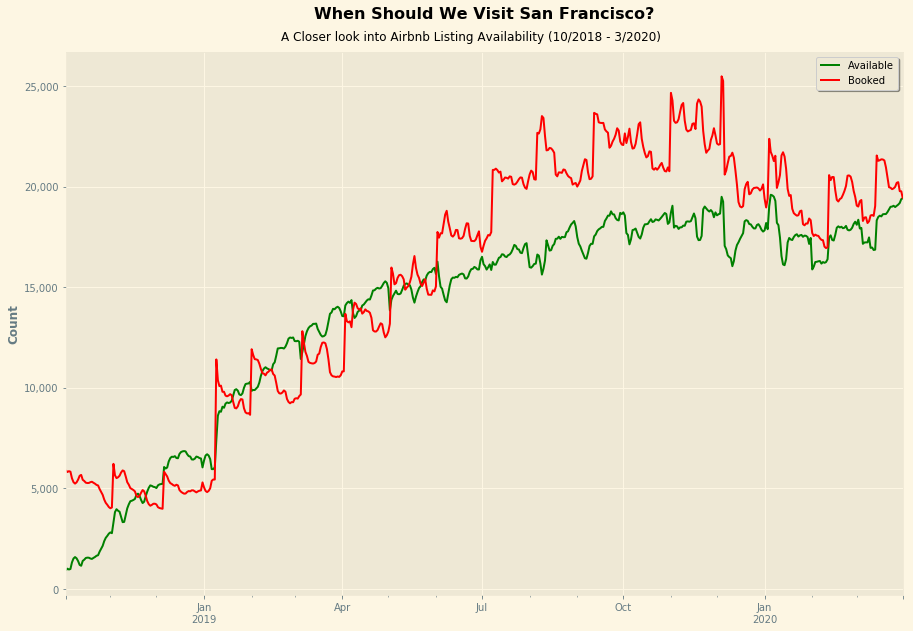

In [112]:
#Set plot figure
fig, ax = plt.subplots(figsize = (15,10))

#Plot Data
j = listings_df[listings_df['available']==1].plot(y = 'count',color = 'g',ax=ax)
g = listings_df[listings_df['available']==0].plot( y = 'count',color = 'r',ax=ax)


###Set plot Aesthetics###
#Title
ax.set_title('When Should We Visit San Francisco?', fontdict = title_dict, y = 1.05)
plt.suptitle('A Closer look into Airbnb Listing Availability (10/2018 - 3/2020)', y = .91)

#Axes
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Labels
ax.set_ylabel('Count', fontdict = label_dict)
ax.set_xlabel('')

#Legend
ax.legend(labels = ['Available','Booked'],frameon = True, shadow = True)

## Proportion of occupied listings by month

**Prepare data**

In [113]:
#Merge unavailable_listings available_listings df's together
count_df = available_listings.merge(unavailable_listings, 
                                    left_index=True,right_index=True, 
                                    suffixes=('_available','_unavailable'))
#Total listings
count_df['total'] = count_df['count_available'] + count_df['count_unavailable']

#Reset Index to extract time data
count_df.reset_index(inplace = True)

#Extract data from index
#count_df['month'] = count_df['date'].dt.month
count_df['month_year'] = count_df['date'].dt.to_period('m')

#Set date as index
count_df.set_index('date', inplace = True)

#Check
display(count_df.head())

,count_available,count_unavailable,total,month_year
date,,,,
2018-10-03,910,5897,6807,2018-10
2018-10-04,1001,5806,6807,2018-10
2018-10-05,960,5847,6807,2018-10
2018-10-06,985,5822,6807,2018-10
2018-10-07,1314,5493,6807,2018-10


**Plot number of occupied listings vs vacant**

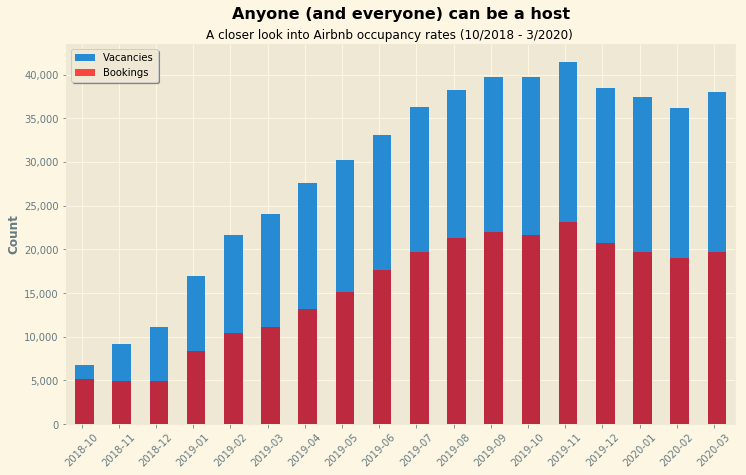

In [114]:
#Create figure
fig, ax = plt.subplots(figsize= (12,7))

#Plot data
count_df.groupby(['month_year'])['total'].mean().plot(kind = 'bar',position = .35, ax=ax)
count_df.groupby(['month_year'])['count_unavailable'].mean().plot(kind = 'bar', color = 'r',
                                                              rot = 45,position = .35,alpha = .7, ax=ax) #Bookings
 
###Set plot aesthetics###
#Title
ax.set_title('Anyone (and everyone) can be a host', fontdict = title_dict, y = 1.05)
plt.suptitle('A closer look into Airbnb occupancy rates (10/2018 - 3/2020)', y = .91)

#Axes
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Labels
ax.set_ylabel('Count', fontdict=label_dict)
ax.set_xlabel('')


#legend
ax.legend(['Vacancies','Bookings'],ncol = 1,loc = 'upper left', frameon = True, shadow = True);

## Explore prices over last 18 months

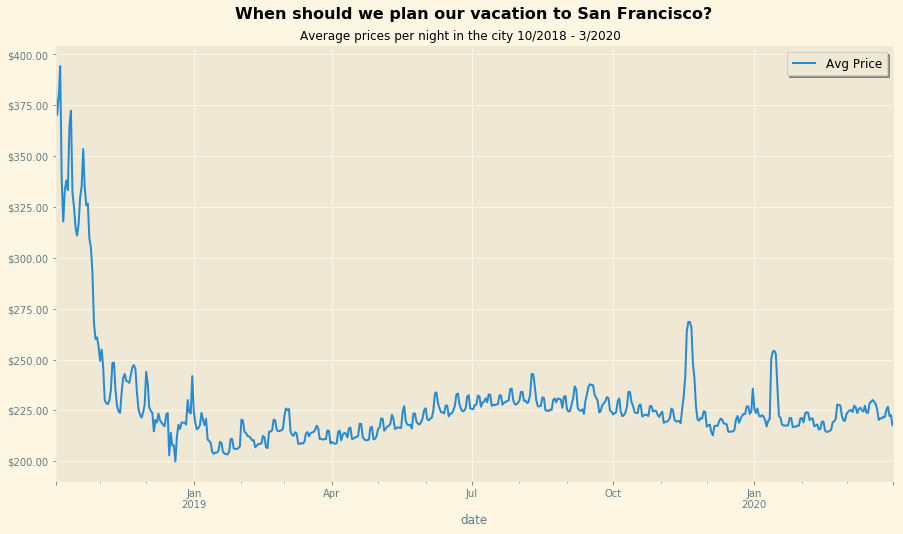

In [115]:
#Set plot size
fig, ax = plt.subplots(figsize = (15,8))

#Plot price data
j = calendar.groupby(['date'])['price'].mean().plot(ax = ax)

###Set plot aesthetics###

#Set Title
j.set_title('When should we plan our vacation to San Francisco?', fontdict = title_dict, y = 1.05)
plt.suptitle('Average prices per night in the city 10/2018 - 3/2020', y = .91)

#Axes
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:.2f}".format(int(x))))

#Set legend
j.legend(labels = ['Avg Price'],frameon = True, loc = 'upper right',fancybox = False, shadow = True, fontsize = 12)

**Avg price comparison for available and unavailable listings**

In [116]:
#Capture avg price for a stay for available and unavailable listings
available_avg_price = calendar[calendar.available == 1].groupby(['date'])['price'].mean().reset_index()
unavailable_avg_price= calendar[calendar.available == 0].groupby(['date'])['price'].mean().reset_index()

#Rename column headers
available_avg_price.columns = ['date', 'avg_price']
unavailable_avg_price.columns = ['date', 'avg_price']

#Set Date as index
available_avg_price.set_index('date', inplace=True)
unavailable_avg_price.set_index('date', inplace=True)

#Check
display(available_avg_price.head())
display(unavailable_avg_price.head())

,avg_price
date,
2018-10-03,384.783516
2018-10-04,370.288711
2018-10-05,378.287500
2018-10-06,394.297462
2018-10-07,338.183409


,avg_price
date,
2018-10-03,NaN
2018-10-04,NaN
2018-10-05,NaN
2018-10-06,NaN
2018-10-07,NaN


*We'll need to filter dates on price to get axes to match*

In [117]:
#Find index of first non-missing value in unavailable_avg_price
print('First non-missing Avg_Price:', unavailable_avg_price.avg_price.first_valid_index())

#Filter avg_price data frames to include dates from 2019-01-09 and onwards
available_avg_price = available_avg_price.loc[(available_avg_price.index >= '2019-01-09')]
unavailable_avg_price = unavailable_avg_price.loc[(unavailable_avg_price.index >= '2019-01-09')]

First non-missing Avg_Price: 2019-01-09 00:00:00


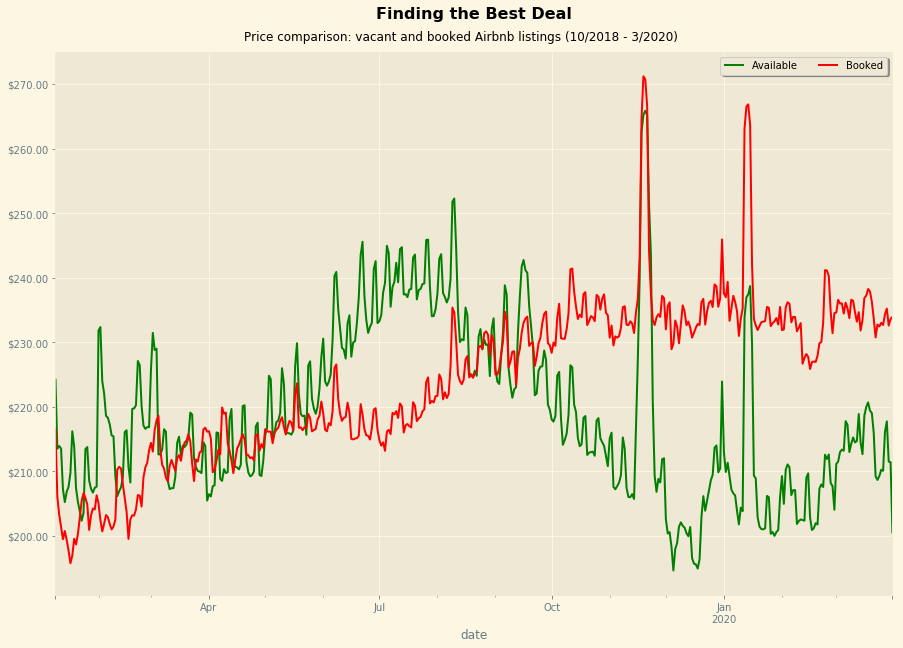

In [118]:
#Set plot size
fig, ax = plt.subplots(figsize = (15,10))

#plot data
j = available_avg_price.plot(ax=ax, color = 'g')
g = unavailable_avg_price.plot(ax=ax, color = 'r')

###Set plot aesthetics###

#Set Title
ax.set_title('Finding the Best Deal',fontdict = title_dict, y = 1.05)
plt.suptitle('Price comparison: vacant and booked Airbnb listings (10/2018 - 3/2020)', y = .91)

#Axes
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:.2f}".format(int(x))))

#Set legend
ax.legend(['Available', 'Booked'], frameon = True, shadow = True, ncol = 2)

Extracting avg price data by month and days of the week

In [119]:
#Merge unavailable_listings available_listings df's together
prices_df = available_avg_price.merge(unavailable_avg_price, 
                                    left_index=True,right_index=True, 
                                    suffixes=('_available','_unavailable'))

#Reset Index to extract time data
prices_df.reset_index(inplace = True)

#Extract data from index
prices_df['weekday'] = prices_df['date'].dt.day_name()
prices_df

#Set date as index
prices_df.set_index('date', inplace = True)

#Check
display(prices_df.head())

,avg_price_available,avg_price_unavailable,weekday
date,,,
2019-01-09,224.350913,216.671527,Wednesday
2019-01-10,213.498838,206.041713,Thursday
2019-01-11,213.929461,203.289594,Friday
2019-01-12,213.525227,201.423011,Saturday
2019-01-13,207.242103,199.477659,Sunday


How do prices vary by day of the week?

Text(0, 0.5, 'Med Rent/Night')

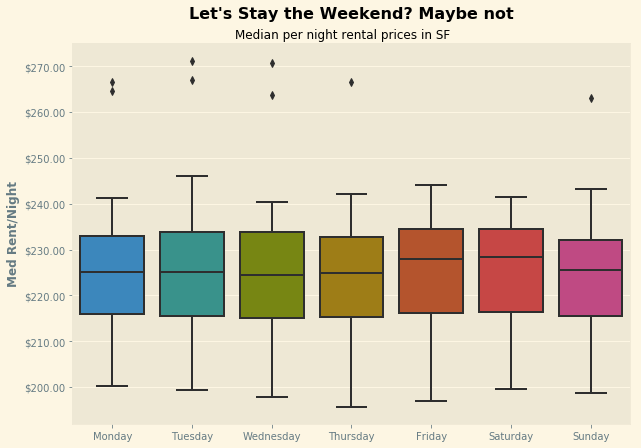

In [120]:
#Create plot
fig, ax = plt.subplots(figsize = (10, 7))

#Plot Data
j = sns.boxplot(x = 'weekday', y='avg_price_unavailable',
            order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'],
            data = prices_df, ax=ax)


###Set plot aesthetics###

#Set Title
j.set_title('Let\'s Stay the Weekend? Maybe not',fontdict = title_dict, y = 1.05)
plt.suptitle('Median per night rental prices in SF', y = .91)

#Axes
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:.2f}".format(int(x))))

#labels
j.set_xlabel('')
j.set_ylabel('Med Rent/Night', fontdict=label_dict)

# Gross Income

In [121]:
#Capture Booked listings
booked = calendar.loc[calendar['available'] == 0].sort_values(by = 'listing_id')
booked = booked.loc[(booked.index >= '2019-01-09')]

#Check
display(booked.head())

,available,listing_id,price
date,,,
2019-11-19,0,100710,NaN
2020-02-29,0,100710,450.0
2020-03-01,0,100710,450.0
2020-03-02,0,100710,450.0
2020-03-03,0,100710,450.0


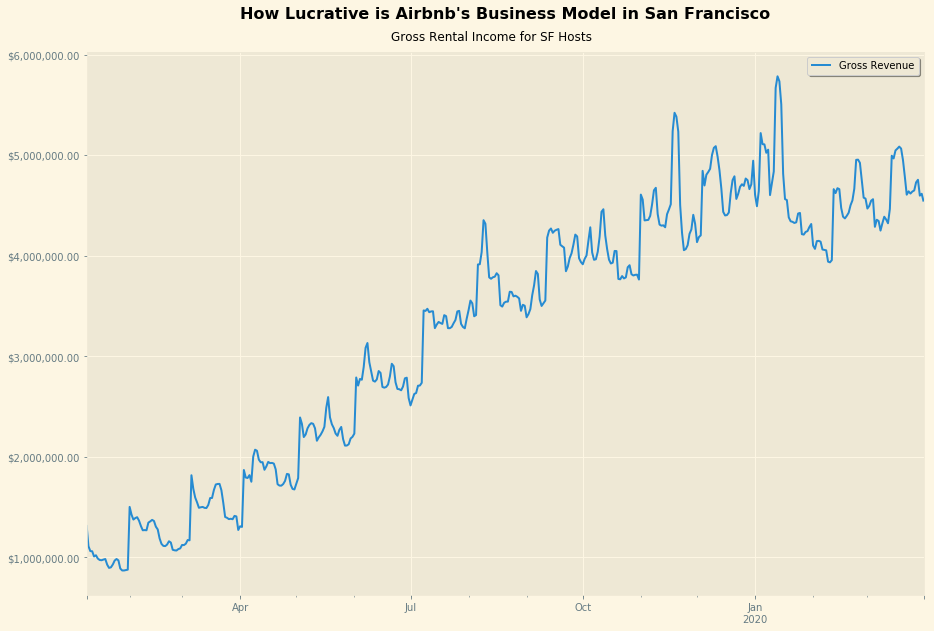

In [123]:
#Set plot size
fig, ax = plt.subplots(figsize = (15,10))

#Plot data
booked.groupby('date')['price'].sum().plot(ax=ax)

###Set plot aesthetics###

#Set Title
ax.set_title('How Lucrative is Airbnb\'s Business Model in San Francisco',fontdict = title_dict, y = 1.05)
plt.suptitle('Gross Rental Income for SF Hosts', y = .91)

#Axes
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
ax.set_xlabel('')

#Set legend
ax.legend(['Gross Revenue'], frameon = True, shadow = True)